In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'per-capita-energy-use.csv')

In [3]:
df.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [4]:
df.columns = ['Country', 'Code', 'Year', 'Consumption']
df.head()

,Country,Code,Year,Consumption
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [5]:
# Check if the number of entries (years) available are the same for all
df.Country.value_counts().tail(20)

Estonia                   35
Latvia                    35
Azerbaijan                35
Aruba                     31
Macedonia                 30
Croatia                   30
Slovenia                  30
Namibia                   27
Armenia                   25
Kyrgyzstan                25
Serbia                    25
Moldova                   25
Tajikistan                25
Bosnia and Herzegovina    25
Georgia                   25
Eritrea                   23
Palestine                 20
Timor                     14
Montenegro                11
South Sudan                5
Name: Country, dtype: int64

In [6]:
df[df['Country'] == 'Moldova']

,Country,Code,Year,Consumption
5135,Moldova,MDA,1992,17673.624934
5136,Moldova,MDA,1993,14309.147020
5137,Moldova,MDA,1994,10416.077369
5138,Moldova,MDA,1995,9014.214368
5139,Moldova,MDA,1996,9972.738813
5140,Moldova,MDA,1997,10010.608908
5141,Moldova,MDA,1998,9328.200508
5142,Moldova,MDA,1999,7436.853983
5143,Moldova,MDA,2000,7594.301636
5144,Moldova,MDA,2001,7428.627766


### Try to keep all data within the same year intervals: (1992 - 2016)

In [7]:
df_copy = df.copy()
# Choose data within the specified date interval
df_copy = df_copy[(df_copy['Year'] >= 1992) & (df_copy['Year'] <= 2019)]
df_copy.head()

,Country,Code,Year,Consumption
12,Afghanistan,AFG,1992,618.619513
13,Afghanistan,AFG,1993,564.894647
14,Afghanistan,AFG,1994,504.612059
15,Afghanistan,AFG,1995,400.105134
16,Afghanistan,AFG,1996,377.588650


### What are the top10 energy consumers in this date interval?

In [8]:
top_ten = df_copy.groupby('Country').agg({'Consumption' : 'sum'}).sort_values(by = 'Consumption', ascending= False).head(10)
top_ten

,Consumption
Country,
Gibraltar,2.879915e+07
United States Virgin Islands,7.196237e+06
Qatar,6.493570e+06
United Arab Emirates,4.372083e+06
Bahrain,3.865300e+06
Iceland,3.794664e+06
Singapore,3.773930e+06
Trinidad and Tobago,3.549073e+06
Kuwait,3.194711e+06


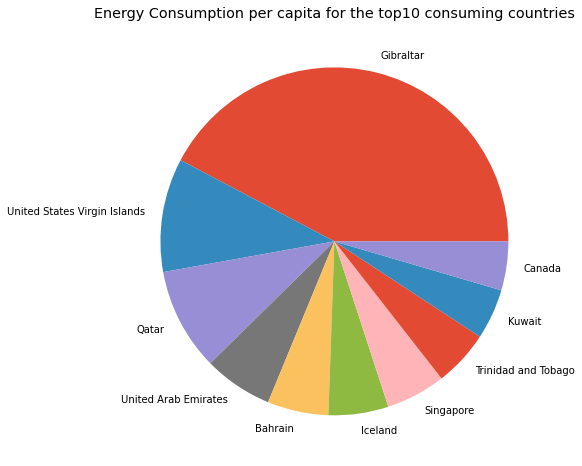

In [9]:
plt.figure(figsize = (8,8))
plt.style.use('ggplot')
plt.pie(top_ten['Consumption'], labels = top_ten.index, shadow = False, normalize = True, wedgeprops = {'linewidth': 2})
plt.title('Energy Consumption per capita for the top10 consuming countries')
plt.show()

### Plot the consumption of Qatar

In [10]:
qatar_df = df_copy[['Country', 'Year' , 'Consumption']]
qatar_df = qatar_df[qatar_df['Country'] == 'Qatar']
qatar_df.head()

,Country,Year,Consumption
6442,Qatar,1992,302394.043262
6443,Qatar,1993,317582.497911
6444,Qatar,1994,316384.923281
6445,Qatar,1995,314614.812012
6446,Qatar,1996,229462.727653


In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Energy Consumption per capita in Qatar')

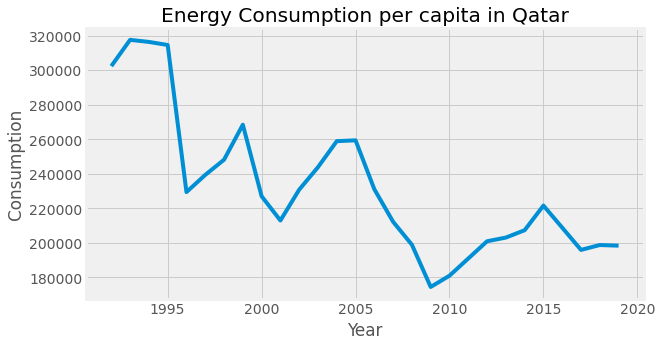

In [12]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
sns.lineplot(x = qatar_df.Year, y = qatar_df['Consumption'])
plt.title('Energy Consumption per capita in Qatar')

### Compare consumption behavior between 4 different countries

In [13]:
# Function to create df per country
def country_df(country):
    country_df = pd.DataFrame()
    country_df = df_copy[['Country', 'Year', 'Consumption']]
    country_df = country_df[country_df['Country'] == country]
    return country_df

In [14]:
uae_df = country_df('United Arab Emirates')
bahrain_df = country_df('Bahrain')
singapore_df = country_df('Singapore')
uae_df.head()

,Country,Year,Consumption
8364,United Arab Emirates,1992,199153.414586
8365,United Arab Emirates,1993,195854.575434
8366,United Arab Emirates,1994,203563.400645
8367,United Arab Emirates,1995,201773.488081
8368,United Arab Emirates,1996,197816.546157


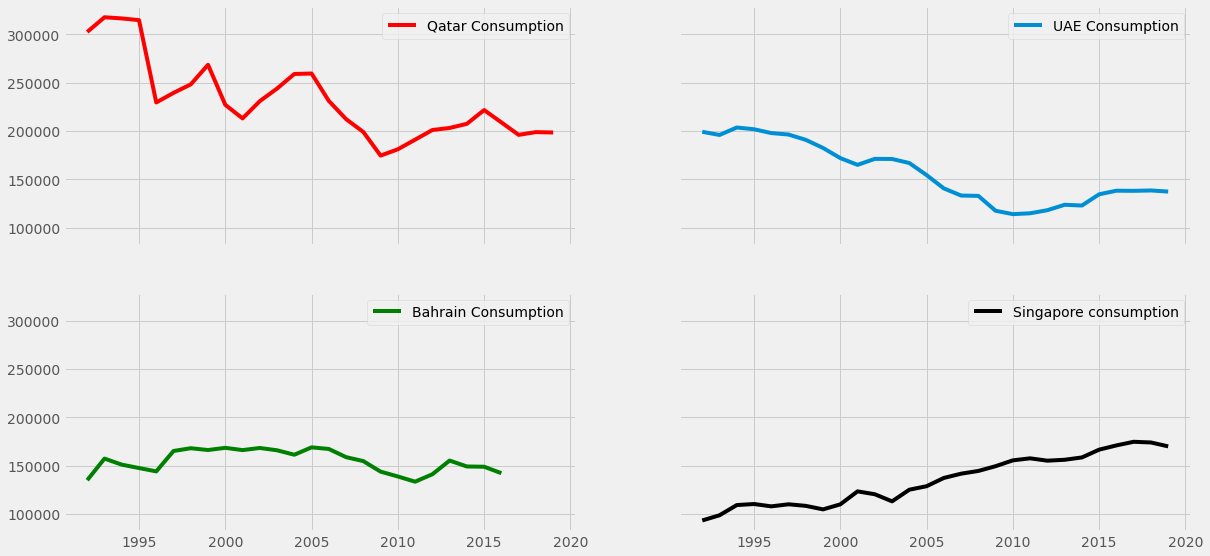

In [15]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex = True, sharey= True, figsize = (18,9))
plt.style.use('seaborn-pastel')
ax1.plot(qatar_df['Year'], qatar_df['Consumption'], color = 'red', label = 'Qatar Consumption')
ax1.legend()
ax2.plot(uae_df['Year'], uae_df['Consumption'], label = 'UAE Consumption')
ax2.legend()
ax3.plot(bahrain_df['Year'], bahrain_df['Consumption'], color = 'green', label = 'Bahrain Consumption')
ax3.legend()
ax4.plot(singapore_df['Year'], singapore_df['Consumption'], color = 'Black', label = 'Singapore consumption')
ax4.legend()
plt.show()

### Visualize total consumption by year 

In [16]:
yearly_df = df.groupby('Year').agg({'Consumption' : 'sum'})
yearly_df.head()

,Consumption
Year,
1965,1.588233e+06
1966,1.624895e+06
1967,1.682771e+06
1968,1.819120e+06
1969,1.909769e+06


Text(0.5, 1.0, 'Yearly Global Consumotion Change')

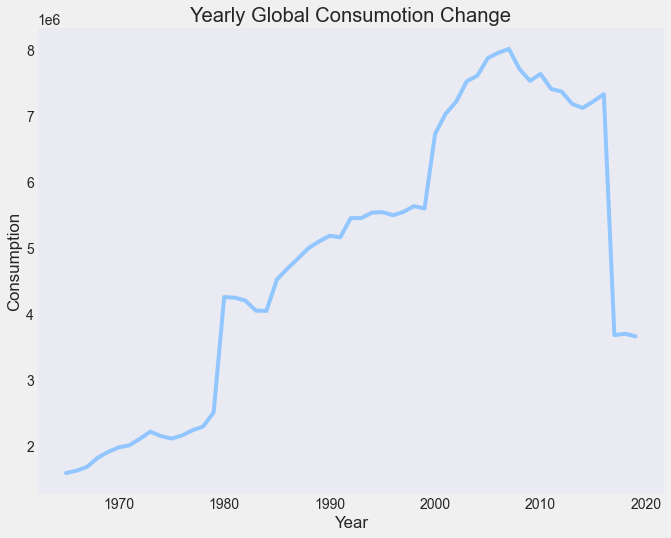

In [17]:
plt.figure(figsize = (10,8))
plt.style.use('seaborn-dark')
sns.lineplot(y = yearly_df['Consumption'], x = yearly_df.index)
plt.title('Yearly Global Consumotion Change')

#### we can see that max energy usage was between the years 2000 and 2010